In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url = r'/Users/yunzhonggao/Downloads/merchant_offers.csv'
merchant_offers = pd.read_csv(url)
url = r'/Users/yunzhonggao/Downloads/offer_views.csv'
offer_views = pd.read_csv(url)
url = r'/Users/yunzhonggao/Downloads/merchants.csv'
merchants = pd.read_csv(url)

In [6]:
offer_views

,business_id,offer_viewed_at
0,000888ce-c44b-4075-8d79-06de87c3ba14,2022-12-29 18:44:15.509000
1,000a6365-6aff-4b41-b295-16dda7bc7ace,2021-11-22 15:27:33.519000
2,000fc1ae-b3fb-402e-9e8b-a6522173af1d,2021-11-22 18:06:48.668000
3,000fc1ae-b3fb-402e-9e8b-a6522173af1d,2023-06-05 14:27:58.487000
4,00100ed0-b822-45dc-b677-7671907fda63,2022-03-03 16:19:46.580000
...,...,...
48327,fffb5ec1-96e4-43e4-8960-74d72b5af2f6,2022-11-16 09:02:25.029000
48328,fffb5ec1-96e4-43e4-8960-74d72b5af2f6,2022-12-29 22:42:23.701000
48329,fffb5ec1-96e4-43e4-8960-74d72b5af2f6,2023-02-27 12:28:50.333000
48330,fffb5ec1-96e4-43e4-8960-74d72b5af2f6,2023-04-22 04:50:59.605000


In [7]:
merchant_offers.head()

,business_id,offer_created_at,offer_closed_at,offer_accepted_at,offer_funded_at,merchant_daily_sales_forecast,offer_amount_max,fee_multiplier,accepted_amount,acceptance_number
0,0019224d-13e9-45d0-9581-743a5b5d38a6,2023-01-18 04:39:01.093309,2023-02-01 07:59:59,NaN,NaN,258.00,15400.0,0.11304,NaN,NaN
1,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-12-21 05:32:32.269204,2023-01-04 07:59:59,NaN,NaN,246.07,15400.0,0.09824,NaN,NaN
2,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-01-09 02:08:45.912000,2022-02-04 07:59:59,NaN,NaN,195.59,5500.0,0.07520,NaN,NaN
3,0019224d-13e9-45d0-9581-743a5b5d38a6,2023-03-02 04:53:57.517703,2023-03-16 06:59:59,NaN,NaN,306.47,11000.0,0.10792,NaN,NaN
4,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-04-10 01:11:34.597518,2022-05-02 06:59:59,NaN,NaN,258.99,6600.0,0.07448,NaN,NaN


In [11]:
merchant_offers['offer_created_at'] = pd.to_datetime(merchant_offers['offer_created_at'])
merchant_offers['offer_closed_at'] = pd.to_datetime(merchant_offers['offer_closed_at'])
merchant_offers['offer_accepted_at'] = pd.to_datetime(merchant_offers['offer_accepted_at'])
merchant_offers['offer_funded_at'] = pd.to_datetime(merchant_offers['offer_funded_at'])
offer_views['offer_viewed_at'] = pd.to_datetime(offer_views['offer_viewed_at'])
merchants['joined_platform_date'] = pd.to_datetime(merchants['joined_platform_date'])


## What proportion of merchants have had a successfully funded offer? Where in the customer journey do we see the most drop-off? What would you hypothesize is responsible?

In [97]:
f= merchant_offers[merchant_offers.accepted_amount.notna()& merchant_offers["offer_funded_at"].notna()].business_id.nunique()

In [98]:
print(f"Count of Merchants have Funded Offer: {f}")

Count of Merchants have Funded Offer: 6961


In [94]:
print(f"Count of Merchants have Offer Accepts: {merchant_offers[merchant_offers.accepted_amount.notna()].business_id.nunique()}")

Count of Merchants have Offer Accepts: 7536


In [95]:
print(f"Count of Merchants have Offer Views : {offer_views.business_id.nunique()}")

Count of Merchants have Offer Views : 14740


In [100]:
print(f"Count of Merchants are Given Offers: {merchant_offers.business_id.nunique()}")

Count of Merchants are Given Offers: 153788


## How successful have we been at acquiring new customers over time? How long does a merchant typically take to accept their first offer? How would you explain these trends?¶

In [102]:
df1 = merchant_offers[merchant_offers.accepted_amount.notna()]
def concat_year_month(df, time_column='offer_accepted_at', new_column='year_month'):
    df[new_column] = df["offer_accepted_at"].dt.to_period('M')
    return df

concat_year_month(df1).head()

<ipython-input-102-f6238e4b216d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df["offer_accepted_at"].dt.to_period('M')


,business_id,offer_created_at,offer_closed_at,offer_accepted_at,offer_funded_at,merchant_daily_sales_forecast,offer_amount_max,fee_multiplier,accepted_amount,acceptance_number,year_month
607,031db098-6d32-4bc7-84f6-f322aa20c61e,2021-05-19 05:14:53.504000,2021-06-19 06:59:59,2021-05-19 16:29:15.015000,2021-08-17 21:31:23.810000,374.67,11550.0,0.06712,11550.0,1.0,2021-05
1173,053427c8-e075-479a-ba5c-a3788321b116,2022-07-06 00:53:27.970068,2022-07-28 06:59:59,2022-07-06 01:09:10.651208,2022-07-06 07:01:11.572828,211.52,7150.0,0.11080,6600.0,3.0,2022-07
1175,053427c8-e075-479a-ba5c-a3788321b116,2021-10-07 21:48:02.764000,2021-11-07 06:59:59,2021-11-01 13:19:05.839000,2021-11-01 13:42:06.782000,138.86,2860.0,0.06216,2860.0,1.0,2021-11
1185,053427c8-e075-479a-ba5c-a3788321b116,2022-02-10 01:05:08.698201,2022-03-12 07:59:59,2022-03-08 15:31:38.290595,2022-03-08 15:41:05.332044,181.29,4400.0,0.08080,4400.0,2.0,2022-03
1984,07ac58ba-b3b8-4c6c-af62-0b961f236f5d,2022-03-05 02:17:17.112737,2022-04-04 06:59:59,2022-03-28 16:35:51.965106,2022-03-30 07:01:04.534972,100.41,2090.0,0.07360,2090.0,1.0,2022-03


In [103]:
p= df1.groupby('year_month').business_id.count().reset_index()

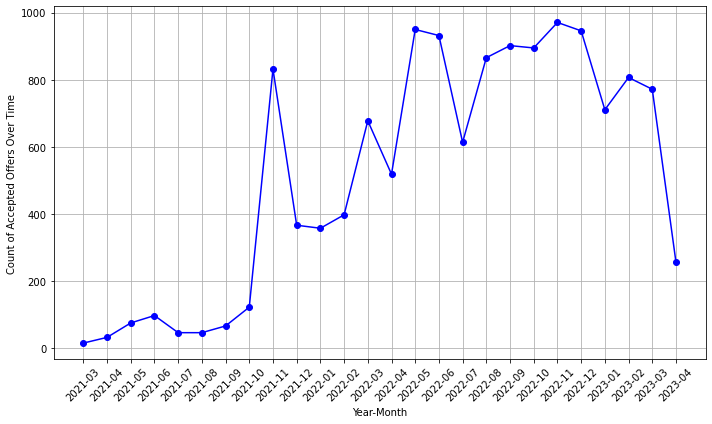

In [104]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(p['year_month'].astype(str), p['business_id'], marker='o', linestyle='-', color='b')
#plt.title('Count of Accepted Offers Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Accepted Offers Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [105]:
df2 = df1[df1["acceptance_number"] == 1]

In [106]:
df2['accept_duration_days'] = (df2['offer_accepted_at'] - df2['offer_created_at']).dt.days


<ipython-input-106-03b397826210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['accept_duration_days'] = (df2['offer_accepted_at'] - df2['offer_created_at']).dt.days


In [115]:
df2.groupby('year_month').accept_duration_days.mean().reset_index()

,year_month,accept_duration_days
0,2021-03,0.533333
1,2021-04,1.333333
2,2021-05,1.066667
3,2021-06,3.714286
4,2021-07,3.906977
5,2021-08,4.613636
6,2021-09,2.840000
7,2021-10,12.115789
8,2021-11,8.286783
9,2021-12,16.596923


In [109]:
df2['offer_duration_days'] = (df2['offer_closed_at'] - df2['offer_created_at']).dt.days


<ipython-input-109-3bd9fe2b65f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['offer_duration_days'] = (df2['offer_closed_at'] - df2['offer_created_at']).dt.days


In [113]:
df2.accept_duration_days.mean()
print(f"Days of the offer duration: {round(df2.offer_duration_days.mean(),1)}")


Days of the offer duration: 20.5


In [114]:
print(f"Days a merchant typically take to accept their first offer: {round(df2.accept_duration_days.mean(),1)}")


Days a merchant typically take to accept their first offer: 9.1


## What attributes of a business, or of an offer, are more likely to result in an acceptance? How would you predict what merchants are most likely to convert? What other information about these merchants would you like to have, to make your prediction more accurate?

In [116]:
# Lets join all three tables together to get the final table, with views_count as a count value since we have no offer_id
offers = merchant_offers.business_id.value_counts().reset_index().rename(columns={'index': 'business_id','business_id': 'offer_count'})
views = offer_views.groupby('business_id').count().reset_index()
accept = df1.groupby('business_id').offer_created_at.count().reset_index()
data1 = pd.merge(offers,views, how = 'left',on = 'business_id')
data2 = pd.merge(data1,accept, how = 'left',on = 'business_id')
data3 = pd.merge(data2, merchants, how = 'left',on = 'business_id')
data3.rename(columns={'offer_viewed_at': 'views_count', 'offer_created_at': 'accepts_count'}, inplace=True)
final = pd.merge(merchant_offers, data3, how = 'left',on = 'business_id')
# create two columns: offers_duration and join_duration_months 
final["offers_duration"] = (final['offer_closed_at'] - final['offer_created_at']).dt.days
final["join_duration_months"] = (final['offer_created_at'] - final['joined_platform_date']).dt.days//30

In [118]:
final.head()

,business_id,offer_created_at,offer_closed_at,offer_accepted_at,offer_funded_at,merchant_daily_sales_forecast,offer_amount_max,fee_multiplier,accepted_amount,acceptance_number,offer_count,views_count,accepts_count,segment,state,market,joined_platform_date,offers_duration,join_duration_months
0,0019224d-13e9-45d0-9581-743a5b5d38a6,2023-01-18 04:39:01.093309,2023-02-01 07:59:59,NaT,NaT,258.00,15400.0,0.11304,NaN,NaN,34,NaN,NaN,MANAGED,IN,Chicago,2018-09-03,14,53
1,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-12-21 05:32:32.269204,2023-01-04 07:59:59,NaT,NaT,246.07,15400.0,0.09824,NaN,NaN,34,NaN,NaN,MANAGED,IN,Chicago,2018-09-03,14,52
2,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-01-09 02:08:45.912000,2022-02-04 07:59:59,NaT,NaT,195.59,5500.0,0.07520,NaN,NaN,34,NaN,NaN,MANAGED,IN,Chicago,2018-09-03,26,40
3,0019224d-13e9-45d0-9581-743a5b5d38a6,2023-03-02 04:53:57.517703,2023-03-16 06:59:59,NaT,NaT,306.47,11000.0,0.10792,NaN,NaN,34,NaN,NaN,MANAGED,IN,Chicago,2018-09-03,14,54
4,0019224d-13e9-45d0-9581-743a5b5d38a6,2022-04-10 01:11:34.597518,2022-05-02 06:59:59,NaT,NaT,258.99,6600.0,0.07448,NaN,NaN,34,NaN,NaN,MANAGED,IN,Chicago,2018-09-03,22,43


In [119]:
# Calculate the accept ratio of different segment 
segment1 = data3[data3["accepts_count"].notna()].segment.value_counts().reset_index().rename(columns= {'index':'segment','segment':'accept_count'})
segment2 = data3.segment.value_counts().reset_index().rename(columns= {'index':'segment','segment':'total_count'})
final_segment = segment1.merge(segment2, on="segment")
final_segment["ratio"] = final_segment["accept_count"]/final_segment["total_count"]
final_segment

,segment,accept_count,total_count,ratio
0,UNMANAGED,6297,78828,0.079883
1,MANAGED,1143,40050,0.028539
2,ENTERPRISE,96,34910,0.002750


In [120]:
# Calculate the accept ratio of different state
state1 = data3[data3["accepts_count"].notna()].state.value_counts().reset_index().rename(columns= {'index':'state','state':'accept_count'})
state2 = data3.state.value_counts().reset_index().rename(columns= {'index':'state','state':'total_count'})
final_state = state1.merge(state2, on="state")
final_state["ratio"] = final_state["accept_count"]/final_state["total_count"]

In [53]:
# CA, TX and NY has the highest accept_count and total_count of offers.
final_state.sort_values(by = 'accept_count',ascending=False).head(20)

,state,accept_count,total_count,ratio
0,CA,1411,27597,0.051129
1,TX,622,13636,0.045615
2,NY,607,10861,0.055888
3,FL,458,9716,0.047139
4,NJ,372,5495,0.067698
5,PA,347,5202,0.066705
6,OH,295,5455,0.054079
7,IL,267,5503,0.048519
8,MI,221,4199,0.052632
9,GA,216,5112,0.042254


In [54]:
# While accept ratio is higher for some small states like AK, NH , WV. There is not very big difference between each state.
final_state.sort_values(by = 'ratio',ascending=False).head(20)

,state,accept_count,total_count,ratio
53,Caguas,1,4,0.250000
52,Toa Baja,1,5,0.200000
54,Ponce,1,8,0.125000
41,AK,24,277,0.086643
47,San Juan,11,129,0.085271
33,NH,37,458,0.080786
32,WV,39,487,0.080082
49,VT,7,89,0.078652
43,MT,18,250,0.072000
35,RI,33,486,0.067901


In [121]:
# The best market is still in NY, CA
data3[data3["accepts_count"].notna()].market.value_counts().head()


New York               800
Southern California    757
Northern California    649
Philadelphia           393
Boston                 346
Name: market, dtype: int64

In [122]:
# In order to understand what are more likely to result in an accpetance, i am thinking of creating a linear regreesion (logistic regression)
# deal with NA in linear regression 
final['accepted'] = final['accepts_count'].notnull().astype(int)
final.accepted_amount.fillna(0, inplace=True)
final.acceptance_number.fillna(0, inplace=True)
final.views_count.fillna(0, inplace=True)
final.accepts_count.fillna(0, inplace=True)

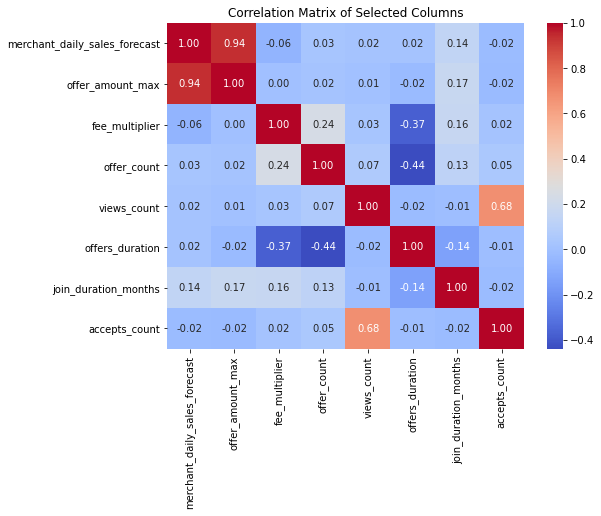

In [124]:
# do a correlation chart first to avoid multicollinearity, offer_amount_max and merchant daily sales forecast are highly correlated, remove merchant daily sales forecast in the model
selected_columns = ['merchant_daily_sales_forecast', 'offer_amount_max', 'fee_multiplier','offer_count','views_count','offers_duration','join_duration_months','accepts_count']
selected_df = final[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Columns')
plt.show()

In [125]:
# actually a logistic regression 
# 
model = smf.glm(formula = "accepts_count ~  offer_amount_max + fee_multiplier + offer_count + views_count + offers_duration +join_duration_months", 
                data = final, 
                family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

/Users/yunzhonggao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/yunzhonggao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
/Users/yunzhonggao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:          accepts_count   No. Observations:              4768484
Model:                            GLM   Df Residuals:                  4768477
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 29 Dec 2023   Deviance:                   3.4427e+07
Time:                        10:19:44   Pearson chi2:                 2.99e+21
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -6.9e+14 

## What kinds of merchants accept more than one offer? How common are these merchants, and how long do they typically wait before taking another advance?

In [128]:
#Get business_id which accpet more than one offer
more_offer = final[final["acceptance_number"]>1].business_id.drop_duplicates()

In [129]:
more_offer = more_offer.reset_index()

In [130]:
#Get business_id which at least accpet one offer
offers = final[final["acceptance_number"]==1].business_id.drop_duplicates()

In [132]:
offers = offers.reset_index()

In [133]:
# left join to get the business_id which accpet only one offer
offer2 = offers.merge(more_offer, on='business_id',how="left")

In [134]:
only_one= offer2[offer2.index_y.isnull()].business_id.drop_duplicates()
only_one= offer2[offer2.index_y.isnull()].business_id.drop_duplicates()
only_one = only_one.reset_index()
test1 = final.merge(only_one, on= 'business_id')
test2 = final[final["acceptance_number"]==1].merge(more_offer, on= 'business_id')

In [148]:
print(f"Ratio of merchants which accept more than one offer : {more_offer.business_id.count()/offers.business_id.count()}")

Ratio of merchants which accept more than one offer : 0.4358327803583278


In [135]:
print(f"Those merchants with only one offer accepted had an average daily sales forecast of : {test1.merchant_daily_sales_forecast.mean()}")
print(f"Those merchants with more than one offer accepted had an average daily sales forecast of : {test2.merchant_daily_sales_forecast.mean()}")

Those merchants with only one offer accepted had an average daily sales forecast of : 312.42981209143045
Those merchants with more than one offer accepted had an average daily sales forecast of : 279.35359360868256


In [136]:
print(f"Those merchants with only one offer accepted had an average offer amount max: {test1.offer_amount_max.mean()}")
print(f"Those merchants with more than one offer accepted had an average offer amount max: {test2.offer_amount_max.mean()}")

Those merchants with only one offer accepted had an average offer amount max: 9958.668782384575
Those merchants with more than one offer accepted had an average offer amount max: 7900.732589689478


In [138]:
print(f"The average days of the merchants with only one offer accepted to close the offer are : {test1.offers_duration.mean()}")
print(f"The average days of the merchants with more than one offer accepted to close the offer sare: {test2.offers_duration.mean()}")

The average days of the merchants with only one offer accepted to close the offer are : 11.6146046071935
The average days of the merchants with more than one offer accepted to close the offer sare: 23.630991860114563


In [139]:
print(f"The average days of the merchants with only one offer between their join platform time and first offer create time are : {test1.join_duration_months.mean()}")
print(f"The average days of the merchants with more than one offer between their join platform time and first offer create time are: {test2.join_duration_months.mean()}")

The average days of the merchants with only one offer between their join platform time and first offer create time are : 27.276467283218437
The average days of the merchants with more than one offer between their join platform time and first offer create time are: 21.45492915284896


In [140]:
# take a look again on most popular state
test2.state.value_counts().head()

CA    588
NY    284
TX    277
PA    182
NJ    179
Name: state, dtype: int64

In [141]:
print(f"The average offers of the merchants with only one offer are : {test1.offer_count.mean()}")
print(f"The average offers of the merchants with more than one offer are: {test2.offer_count.mean()}")

The average offers of the merchants with only one offer are : 66.07338868624531
The average offers of the merchants with more than one offer are: 33.656014470907444


In [149]:
offer_1 = final[(final["acceptance_number"]==1) & (final["offer_funded_at"] .notna())][["business_id","offer_accepted_at"]].merge(more_offer, on= 'business_id')[["business_id","offer_accepted_at"]].drop_duplicates()
offer_1 = offer_1.rename(columns= {'offer_accepted_at':'first_offer_accept_at'})
offer_2 = final[(final["acceptance_number"]==2) & (final["offer_funded_at"] .notna())].merge(offer_1,on= 'business_id')
offer_2["duration"] = (offer_2['offer_accepted_at'] - offer_2['first_offer_accept_at']).dt.days
print(f"Days merchants typically wait before taking another advance : {offer_2.duration.mean()}")

Days merchants typically wait before taking another advance : 159.98281681497392


## Based on your analysis of the data, what experiments and/or product initiatives would you suggest to improve our ability to convert small businesses into customers of ours?
